<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/DL_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of VGG-16 for training images and Classification**

**VGG-16, or Visual Geometry Group 16**, is a convolutional neural network (CNN) architecture commonly used in deep learning and computer vision tasks, particularly for image classification and object recognition. It was developed by the Visual Geometry Group at the University of Oxford.

**Here's an overview of the VGG-16 architecture**:

**Input Layer:** The network accepts RGB images as input, typically with a fixed size of 224x224 pixels.

**Convolutional Layers:** VGG-16 consists of 13 convolutional layers stacked on top of each other. These layers are relatively small (3x3 convolutional filters), which is a key characteristic of VGG networks.

**Max-Pooling Layers:** After each pair of convolutional layers, there is a max-pooling layer.

**Fully Connected Layers:** Following the convolutional and max-pooling layers, there are three fully connected layers. The first two fully connected layers have 4,096 neurons each, and the last fully connected layer has 1,000 neurons.

**Softmax Layer:** The final layer is a softmax layer, which normalizes the output of the last fully connected layer to produce class probabilities..

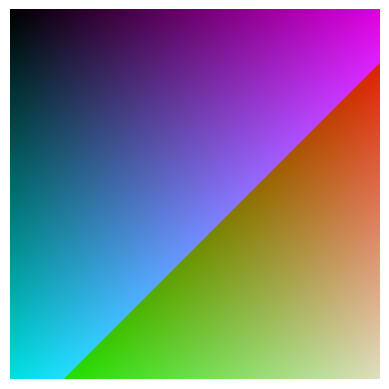

35363/35363 [==============================] - 0s 0us/step
1: envelope (0.18)
2: umbrella (0.10)
3: spotlight (0.07)
4: lampshade (0.05)
5: rule (0.03)


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt

# Load the VGG-16 model pre-trained on ImageNet
model = VGG16(weights='imagenet')

# Create a sample image using PIL
img = Image.new('RGB', (224, 224))
pixels = img.load()
for i in range(224):
    for j in range(224):
        pixels[i, j] = (i % 256, j % 256, (i + j) % 256)  # RGB color pattern

# Display the sample image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the PIL image to a NumPy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions with the model
predictions = model.predict(img_array)

# Decode and display the top predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")
